#### ***5. Develop a visualization that compares the number of replies, retweets, and likes for tweets that have received media engagements greater than the median value. Include a filter for tweets posted in between June and August of 2020 and this graph should work only between 3PM IST to 5 PM IST and 7 AM to 11AM apart from that time we should not show this graph in dashboard itself and tweet date should be odd number and media views should be even number as well as tweet character count should be above 20 and need to remove tweet word which has letter 'S'.***

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import re

"""
This script performs the following tasks:
1.  Loads the twitter.csv dataset.
2.  Filters tweets based on the following criteria:
    - Media engagements greater than the median value.
    - Tweets posted between June and August of 2020.
    - Tweet date (day of the month) is an odd number.
    - Media views are an even number.
    - Tweet character count is above 20.
3.  Removes words containing the letter 's' from the tweet text.
4.  Creates a bar plot comparing replies, retweets, and likes for the filtered tweets.
5.  Saves the plot to the 'Plots' directory.
"""

"\nThis script performs the following tasks:\n1.  Loads the twitter.csv dataset.\n2.  Filters tweets based on the following criteria:\n    - Media engagements greater than the median value.\n    - Tweets posted between June and August of 2020.\n    - Tweet date (day of the month) is an odd number.\n    - Media views are an even number.\n    - Tweet character count is above 20.\n3.  Removes words containing the letter 's' from the tweet text.\n4.  Creates a bar plot comparing replies, retweets, and likes for the filtered tweets.\n5.  Saves the plot to the 'Plots' directory.\n"

In [31]:
def remove_words_with_s(text):
    """
    Removes words containing the letter 's' (case-insensitive) from a given text.
    """
    if isinstance(text, str):
        # Use regex to find all words containing 's' or 'S' and remove them
        return re.sub(r'\b\w*[sS]\w*\b', '', text).strip()
    return text

In [32]:
# Load the dataset
df = pd.read_csv('../twitter.csv')

In [33]:
df.head(5)

,Unnamed: 0,Tweet,id,time,impressions,engagements,engagement rate,retweets,replies,likes,...,url clicks,hashtag clicks,detail expands,media views,media engagements,date,time_extracted,Day,Month,Year
0,0,id ligula suspendisse ornare consequat lectus ...,6.670000e+15,2020-06-30 21:09:00+00:00,365,4,0.010959,0,0,1,...,0,0,1,0,0,30-06-2020,21:09,30,6,2020
1,1,euismod scelerisque quam turpis adipiscing lor...,8.270000e+15,2020-06-30 17:14:00+00:00,184,2,0.010870,0,0,2,...,0,0,0,0,0,30-06-2020,17:14,30,6,2020
2,2,leo rhoncus sed vestibulum sit amet cursus id ...,2.810000e+14,2020-06-30 16:59:00+00:00,2644,46,0.017398,1,1,17,...,3,0,23,354,1,30-06-2020,16:59,30,6,2020
3,3,aenean lectus pellentesque eget nunc donec qui...,7.760000e+15,2020-06-30 13:55:00+00:00,301,3,0.009967,0,1,2,...,0,0,0,0,0,30-06-2020,13:55,30,6,2020
4,4,sed accumsan felis ut at dolor quis odio conse...,6.130000e+15,2020-06-30 12:13:00+00:00,528,0,0.000000,0,0,0,...,0,0,0,0,0,30-06-2020,12:13,30,6,2020


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1166 non-null   int64  
 1   Tweet                1166 non-null   object 
 2   id                   1166 non-null   float64
 3   time                 1166 non-null   object 
 4   impressions          1166 non-null   int64  
 5   engagements          1166 non-null   int64  
 6   engagement rate      1166 non-null   float64
 7   retweets             1166 non-null   int64  
 8   replies              1166 non-null   int64  
 9   likes                1166 non-null   int64  
 10  user profile clicks  1166 non-null   int64  
 11  url clicks           1166 non-null   int64  
 12  hashtag clicks       1166 non-null   int64  
 13  detail expands       1166 non-null   int64  
 14  media views          1166 non-null   int64  
 15  media engagements    1166 non-null   i

In [35]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['date'], dayfirst=True)

In [36]:
# Calculate and show the median value
median_media_engagements = df['media engagements'].median()
print("Median media engagements:", median_media_engagements)

# Filtering condition: media engagements > median
df_filtered = df[df['media engagements'] > median_media_engagements]

Median media engagements: 0.0


In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 2 to 1162
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           342 non-null    int64         
 1   Tweet                342 non-null    object        
 2   id                   342 non-null    float64       
 3   time                 342 non-null    object        
 4   impressions          342 non-null    int64         
 5   engagements          342 non-null    int64         
 6   engagement rate      342 non-null    float64       
 7   retweets             342 non-null    int64         
 8   replies              342 non-null    int64         
 9   likes                342 non-null    int64         
 10  user profile clicks  342 non-null    int64         
 11  url clicks           342 non-null    int64         
 12  hashtag clicks       342 non-null    int64         
 13  detail expands       342 non-null    in

In [38]:
# 2. Tweets posted between June and August of 2020
df_filtered = df_filtered[(df_filtered['Date'].dt.month >= 6) & (df_filtered['Date'].dt.month <= 8) & (df_filtered['Date'].dt.year == 2020)]

In [39]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 2 to 751
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           206 non-null    int64         
 1   Tweet                206 non-null    object        
 2   id                   206 non-null    float64       
 3   time                 206 non-null    object        
 4   impressions          206 non-null    int64         
 5   engagements          206 non-null    int64         
 6   engagement rate      206 non-null    float64       
 7   retweets             206 non-null    int64         
 8   replies              206 non-null    int64         
 9   likes                206 non-null    int64         
 10  user profile clicks  206 non-null    int64         
 11  url clicks           206 non-null    int64         
 12  hashtag clicks       206 non-null    int64         
 13  detail expands       206 non-null    int

In [40]:
# 3. Tweet date is an odd number
df_filtered = df_filtered[df_filtered['Date'].dt.day % 2 != 0]

In [41]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 38 to 751
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           109 non-null    int64         
 1   Tweet                109 non-null    object        
 2   id                   109 non-null    float64       
 3   time                 109 non-null    object        
 4   impressions          109 non-null    int64         
 5   engagements          109 non-null    int64         
 6   engagement rate      109 non-null    float64       
 7   retweets             109 non-null    int64         
 8   replies              109 non-null    int64         
 9   likes                109 non-null    int64         
 10  user profile clicks  109 non-null    int64         
 11  url clicks           109 non-null    int64         
 12  hashtag clicks       109 non-null    int64         
 13  detail expands       109 non-null    in

In [42]:
# 4. Media views are an even number
df_filtered = df_filtered[df_filtered['media views'] % 2 == 0]

In [43]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 38 to 740
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           58 non-null     int64         
 1   Tweet                58 non-null     object        
 2   id                   58 non-null     float64       
 3   time                 58 non-null     object        
 4   impressions          58 non-null     int64         
 5   engagements          58 non-null     int64         
 6   engagement rate      58 non-null     float64       
 7   retweets             58 non-null     int64         
 8   replies              58 non-null     int64         
 9   likes                58 non-null     int64         
 10  user profile clicks  58 non-null     int64         
 11  url clicks           58 non-null     int64         
 12  hashtag clicks       58 non-null     int64         
 13  detail expands       58 non-null     int

In [44]:
# 5. Tweet character count > 20
df_filtered = df_filtered[df_filtered['Tweet'].str.len() > 20]

In [45]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 38 to 740
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           58 non-null     int64         
 1   Tweet                58 non-null     object        
 2   id                   58 non-null     float64       
 3   time                 58 non-null     object        
 4   impressions          58 non-null     int64         
 5   engagements          58 non-null     int64         
 6   engagement rate      58 non-null     float64       
 7   retweets             58 non-null     int64         
 8   replies              58 non-null     int64         
 9   likes                58 non-null     int64         
 10  user profile clicks  58 non-null     int64         
 11  url clicks           58 non-null     int64         
 12  hashtag clicks       58 non-null     int64         
 13  detail expands       58 non-null     int

In [46]:
# Remove words with 's' from the 'Tweet' column
df_filtered['Tweet'] = df_filtered['Tweet'].apply(remove_words_with_s)

# Calculate the sum of replies, retweets, and likes for the filtered tweets
total_replies = df_filtered['replies'].sum()
total_retweets = df_filtered['retweets'].sum()
total_likes = df_filtered['likes'].sum()

In [47]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 38 to 740
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           58 non-null     int64         
 1   Tweet                58 non-null     object        
 2   id                   58 non-null     float64       
 3   time                 58 non-null     object        
 4   impressions          58 non-null     int64         
 5   engagements          58 non-null     int64         
 6   engagement rate      58 non-null     float64       
 7   retweets             58 non-null     int64         
 8   replies              58 non-null     int64         
 9   likes                58 non-null     int64         
 10  user profile clicks  58 non-null     int64         
 11  url clicks           58 non-null     int64         
 12  hashtag clicks       58 non-null     int64         
 13  detail expands       58 non-null     int

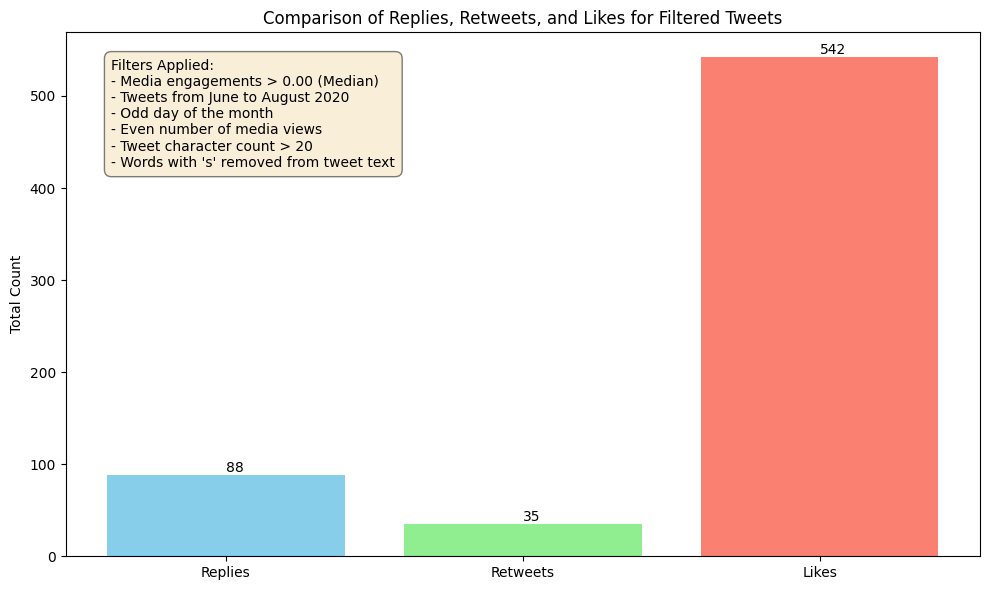

In [48]:
# Data for plotting
engagement_metrics = {
    'Replies': total_replies,
    'Retweets': total_retweets,
    'Likes': total_likes
}
metrics = list(engagement_metrics.keys())
values = list(engagement_metrics.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'salmon'])

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va: vertical alignment

plt.title('Comparison of Replies, Retweets, and Likes for Filtered Tweets')
plt.ylabel('Total Count')

# Description of filters applied
filter_desc = (
    f"Filters Applied:\n"
    f"- Media engagements > {median_media_engagements:.2f} (Median)\n"
    f"- Tweets from June to August 2020\n"
    f"- Odd day of the month\n"
    f"- Even number of media views\n"
    f"- Tweet character count > 20\n"
    f"- Words with 's' removed from tweet text"
)

plt.text(0.05, 0.95, filter_desc, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.tight_layout()

# Save the plot
plt.savefig('../Plots/task_05_filtered_tweet_analysis.png')

# Show the plot
plt.show()